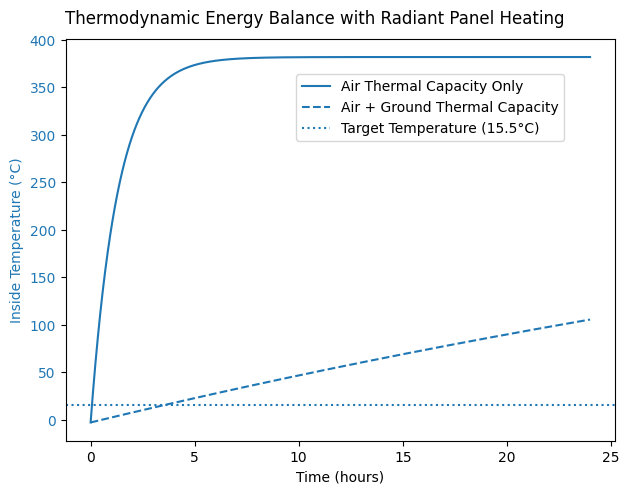

<Figure size 1200x600 with 0 Axes>

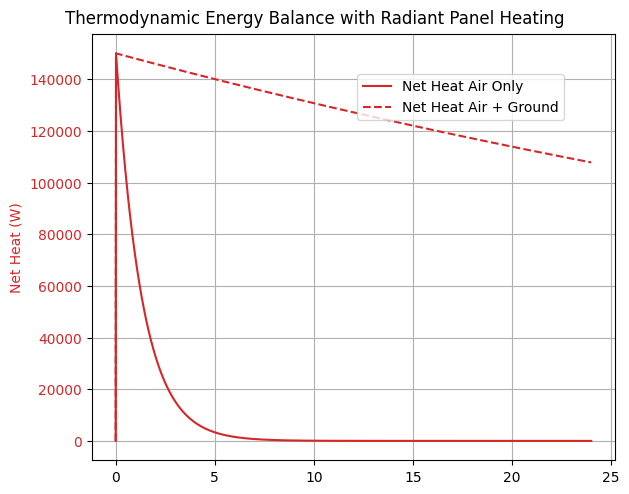

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Define building parameters
wall_area = 100.0    # m²
roof_area = 150.0    # m²
floor_area = 150.0   # m²

U_wall = 1.5         # W/(m²·K)
U_roof = 0.9         # W/(m²·K)
U_floor = 0.7        # W/(m²·K)

# Temperature parameters
inside_temp_target = 15.5     # °C
initial_inside_temp = -3.0    # °C
outside_temp = -3.0           # °C (initially equal to inside)

# Radiant heating panel parameters (from ESXP-3-15)
panel_output_avg = 30000.0    # W average per panel run from data
num_panel_runs = 5            # Number of panel runs (example)

# Thermal capacities
volume_air = 1500.0           # m³ (e.g., 150 m² floor area, 10 m height)
air_density = 1.225           # kg/m³
specific_heat_air = 1005      # J/(kg·K)
thermal_capacity_air = volume_air * air_density * specific_heat_air  # J/K

# Ground thermal capacity (optional)
ground_thermal_capacity = 1e8  # J/K (example value)

# Simulation parameters
time_step = 60                # seconds
total_simulation_time = 24 * 3600  # seconds (24 hours)
time_steps = int(total_simulation_time / time_step)

time = np.linspace(0, total_simulation_time, time_steps)
inside_temp_air_only = np.zeros(time_steps)
inside_temp_with_ground = np.zeros(time_steps)
net_heat_air_only_list = np.zeros(time_steps)
net_heat_with_ground_list = np.zeros(time_steps)

# Initial conditions
inside_temp_air_only[0] = initial_inside_temp
inside_temp_with_ground[0] = initial_inside_temp

# Heat loss function
def calculate_heat_loss(delta_T):
    return (wall_area * U_wall + roof_area * U_roof + floor_area * U_floor) * delta_T

# Simulation loop
for t in range(1, time_steps):
    delta_T_air_only = inside_temp_air_only[t-1] - outside_temp
    delta_T_ground = inside_temp_with_ground[t-1] - outside_temp

    heat_loss_air_only = calculate_heat_loss(delta_T_air_only)
    heat_loss_with_ground = calculate_heat_loss(delta_T_ground)

    heat_input = panel_output_avg * num_panel_runs

    # Net heat balance
    net_heat_air_only = heat_input - heat_loss_air_only
    net_heat_with_ground = heat_input - heat_loss_with_ground

    net_heat_air_only_list[t] = net_heat_air_only
    net_heat_with_ground_list[t] = net_heat_with_ground

    # Temperature update
    inside_temp_air_only[t] = inside_temp_air_only[t-1] + (net_heat_air_only * time_step) / thermal_capacity_air
    inside_temp_with_ground[t] = inside_temp_with_ground[t-1] + (net_heat_with_ground * time_step) / (thermal_capacity_air + ground_thermal_capacity)

# Convert time to hours for plotting
time_hours = time / 3600

#Plot results
fig, ax1 = plt.subplots()
plt.figure(figsize=(12, 6))
ax1.set_xlabel('Time (hours)')
ax1.set_ylabel('Inside Temperature (°C)', color='tab:blue')
ax1.plot(time_hours, inside_temp_air_only, label='Air Thermal Capacity Only', color='tab:blue', linestyle='-')
ax1.plot(time_hours, inside_temp_with_ground, label='Air + Ground Thermal Capacity', color='tab:blue', linestyle='--')
ax1.axhline(inside_temp_target, color='tab:blue', linestyle=':', label='Target Temperature (15.5°C)')
ax1.tick_params(axis='y', labelcolor='tab:blue')
fig.tight_layout()
fig.suptitle('Thermodynamic Energy Balance with Radiant Panel Heating', y=1.02)
fig.legend(loc='upper right', bbox_to_anchor=(0.9, 0.9))


fig2, ax2 = plt.subplots()  # instantiate a second axes that shares the same x-axis
#ax2.set_ylim(bottom=0)  # Set y-axis limits for net heat
ax2.set_ylabel('Net Heat (W)', color='tab:red')
ax2.plot(time_hours, net_heat_air_only_list, label='Net Heat Air Only', color='tab:red', linestyle='-')
ax2.plot(time_hours, net_heat_with_ground_list, label='Net Heat Air + Ground', color='tab:red', linestyle='--')
ax2.tick_params(axis='y', labelcolor='tab:red')

fig2.tight_layout()
fig2.suptitle('Thermodynamic Energy Balance with Radiant Panel Heating', y=1.02)
fig2.legend(loc='upper right', bbox_to_anchor=(0.9, 0.9))
plt.grid(True)
plt.show()

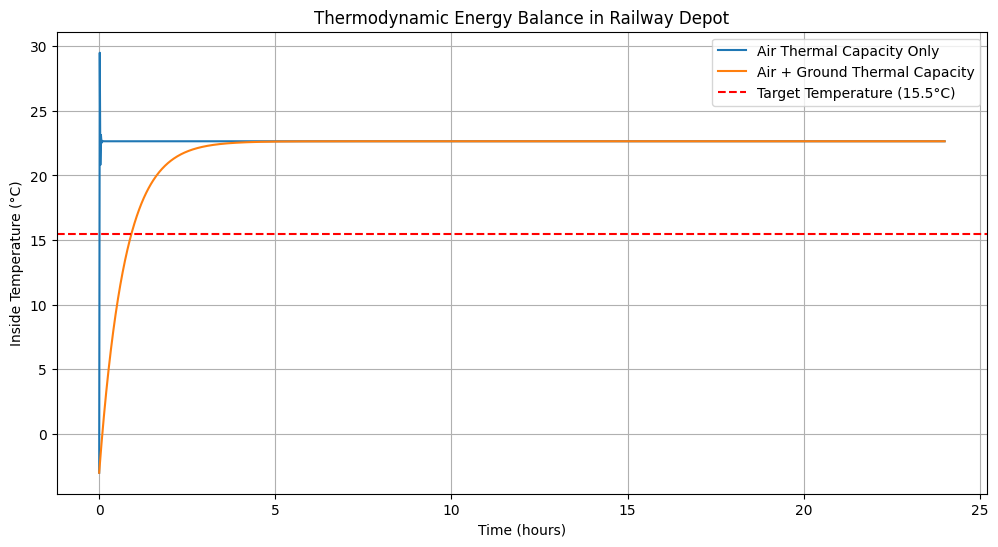

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Define building parameters
wall_area = 10000.0    # m²
roof_area = 15000.0    # m²
floor_area = 15000.0   # m²

U_wall = 1.5         # W/(m²·K)
U_roof = 0.9         # W/(m²·K)
U_floor = 0.7        # W/(m²·K)

# Temperature parameters
inside_temp_target = 15.5     # °C
initial_inside_temp = -3.0    # °C
outside_temp = -3.0           # °C (initially equal to inside)

# Heating system parameters (from Ecostrip XP data)
panel_outputs = 20000  # W
#average_panel_output = sum(panel_outputs) / len(panel_outputs)
total_panels = 50
heater_power_total = panel_outputs * total_panels  # W

# Thermal capacities
volume_air = 1500.0           # m³ (e.g., 150 m² floor area, 10 m height)
air_density = 1.225           # kg/m³
specific_heat_air = 1005      # J/(kg·K)
thermal_capacity_air = volume_air * air_density * specific_heat_air  # J/K

# Ground thermal capacity (optional)
ground_thermal_capacity = 1e8  # J/K (example value)

# Simulation parameters
time_step = 60                # seconds
total_simulation_time = 24 * 3600  # seconds (24 hours)
time_steps = int(total_simulation_time / time_step)

time = np.linspace(0, total_simulation_time, time_steps)
inside_temp_air_only = np.zeros(time_steps)
inside_temp_with_ground = np.zeros(time_steps)

# Initial conditions
inside_temp_air_only[0] = initial_inside_temp
inside_temp_with_ground[0] = initial_inside_temp

# Heat loss function
def calculate_heat_loss(delta_T):
    return (wall_area * U_wall + roof_area * U_roof + floor_area * U_floor) * delta_T

# Simulation loop
for t in range(1, time_steps):
    delta_T_air_only = inside_temp_air_only[t-1] - outside_temp
    delta_T_ground = inside_temp_with_ground[t-1] - outside_temp

    heat_loss_air_only = calculate_heat_loss(delta_T_air_only)
    heat_loss_with_ground = calculate_heat_loss(delta_T_ground)

    heat_input = heater_power_total

    # Net heat balance
    net_heat_air_only = heat_input - heat_loss_air_only
    net_heat_with_ground = heat_input - heat_loss_with_ground

    # Temperature update
    inside_temp_air_only[t] = inside_temp_air_only[t-1] + (net_heat_air_only * time_step) / thermal_capacity_air
    inside_temp_with_ground[t] = inside_temp_with_ground[t-1] + (net_heat_with_ground * time_step) / (thermal_capacity_air + ground_thermal_capacity)

# Convert time to hours for plotting
time_hours = time / 3600

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(time_hours, inside_temp_air_only, label='Air Thermal Capacity Only')
plt.plot(time_hours, inside_temp_with_ground, label='Air + Ground Thermal Capacity')
plt.axhline(inside_temp_target, color='red', linestyle='--', label='Target Temperature (15.5°C)')
plt.xlabel('Time (hours)')
plt.ylabel('Inside Temperature (°C)')
plt.title('Thermodynamic Energy Balance in Railway Depot')
plt.legend()
plt.grid(True)
plt.show()



## **Mathematical Formulation**

### 1. **Heat Loss Calculation**

The heat loss ($Q_{\text{loss}}$) through the building envelope is calculated by summing losses through walls, roof, and floor:

$$
Q_{\text{loss}} = (A_{\text{wall}}U_{\text{wall}} + A_{\text{roof}}U_{\text{roof}} + A_{\text{floor}}U_{\text{floor}}) \times \Delta T
$$

Where:

* $A_{\text{wall}}$, $A_{\text{roof}}$, $A_{\text{floor}}$ are areas of wall, roof, and floor (m²)
* $U_{\text{wall}}$, $U_{\text{roof}}$, $U_{\text{floor}}$ are U-values (W/(m²·K))
* $\Delta T$ is temperature difference between inside and outside (K or °C)

---

### 2. **Heating Input from Radiant Panels**

The total heat input ($Q_{\text{input}}$) from radiant panels:

$$
Q_{\text{input}} = Q_{\text{average per panel}} \times N_{\text{panels}}
$$

Where:

* $Q_{\text{average per panel}}$ is the average radiant panel output (W)
* $N_{\text{panels}}$ is the total number of panels

---

### 3. **Net Heat Balance**

The net heat balance ($Q_{\text{net}}$) is the difference between input and loss:

$$
Q_{\text{net}} = Q_{\text{input}} - Q_{\text{loss}}
$$

---

### 4. **Temperature Increase Rate (Transient Model)**

The transient rate of temperature increase ($\frac{dT}{dt}$) is given by:

* **Air thermal capacity only:**

$$
\frac{dT}{dt} = \frac{Q_{\text{net}}}{m_{\text{air}}c_{p,\text{air}}}
$$

* **Combined air and ground thermal capacity:**

$$
\frac{dT}{dt} = \frac{Q_{\text{net}}}{m_{\text{air}}c_{p,\text{air}} + C_{\text{ground}}}
$$

Where:

* $m_{\text{air}} = V_{\text{air}} \rho_{\text{air}}$ (kg) is the mass of air
* $V_{\text{air}}$ is volume of air (m³)
* $\rho_{\text{air}}$ is density of air (kg/m³)
* $c_{p,\text{air}}$ is specific heat capacity of air (J/kg·K)
* $C_{\text{ground}}$ is ground thermal capacity (J/K)

---

### 5. **Numerical Time Integration (Euler Method)**

The numerical approximation for temperature update at each time step $t$ is:

$$
T_{t} = T_{t-1} + \frac{Q_{\text{net}} \Delta t}{\text{Thermal Capacity}}
$$

Where:

* $T_{t}$ and $T_{t-1}$ are temperatures at current and previous time steps (°C)
* $\Delta t$ is the time step duration (s)

